In [68]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from matplotlib import pyplot as plt

In [85]:
# get the json from the API and turn it into a dataframe
response = requests.get("https://api-data.public-prod.qare.tech/test_data_science/")
data = pd.json_normalize(response.json())

In [139]:
# extract consultation dates
dates = []
for date in data.consultation_date:
    dates.append(datetime.strptime(date, '%Y-%m-%dT%H:%M:%S'))

data['extracted_consultation_date'] = dates
data

,consultation_date,physician_id,patient_id,speciality,cim10,extracted_consultation_date
0,2022-04-07T09:20:00,121,0,general-practician,"Grippe, à virus grippal saisonnier identifié",2022-04-07 09:20:00
1,2021-10-01T12:00:00,55,1,general-practician,Sinusite aiguë,2021-10-01 12:00:00
2,2022-05-04T20:40:00,88,2,general-practician,Rhinopharyngite aiguë [rhume banal],2022-05-04 20:40:00
3,2022-07-22T21:30:00,128,3,general-practician,Autres cystites,2022-07-22 21:30:00
4,2021-01-06T07:10:00,31,4,general-practician,"Grippe, virus non identifié",2021-01-06 07:10:00
...,...,...,...,...,...,...
4995,2021-08-31T15:40:00,0,4687,general-practician,Lombalgie basse,2021-08-31 15:40:00
4996,2021-05-16T08:15:00,55,4688,general-practician,Autres cystites,2021-05-16 08:15:00
4997,2021-09-28T17:00:00,37,4689,general-practician,"Bronchite aiguë, sans précision",2021-09-28 17:00:00
4998,2022-07-01T11:10:00,121,4690,general-practician,Lombalgie basse,2022-07-01 11:10:00


In [141]:
# descriptive statistical data on consultations
print('Number of Patients:', data.shape[0])
print('Number of Physicians:', len(data.physician_id.unique()))
print('Number of Diseases:', len(data.cim10.unique()))
print('Number of Practiced Days:', len(data.extracted_consultation_date.dt.date.unique()))

popularity = data.physician_id.value_counts()
patients = data.patient_id.value_counts()
diseases = data.cim10.value_counts()
print('\nPhyisican with most consultations:', popularity.idxmax(), '(', popularity.max(), 'consultations )')
print('Patient with most consultations:', patients.idxmax(), '(', patients.max(), 'consultations )')
print('Most common desease:', diseases.idxmax(), '(', diseases.max(), 'appearances )')

Number of Patients: 5000
Number of Physicians: 152
Number of Diseases: 534
Number of Practiced Days: 606

Phyisican with most consultations: 55 ( 929 consultations )
Patient with most consultations: 1628 ( 4 consultations )
Most common desease: Gastro-entérite et colite toxiques ( 415 appearances )


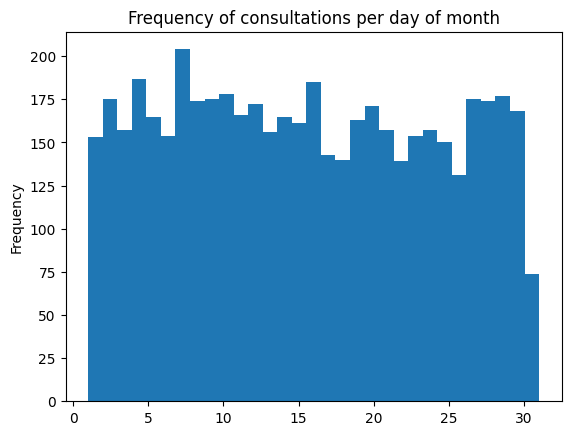

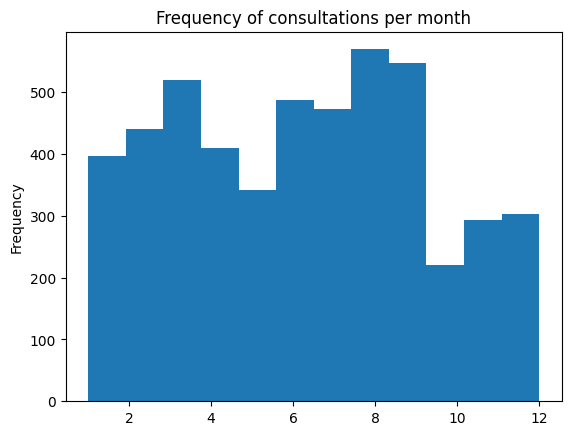

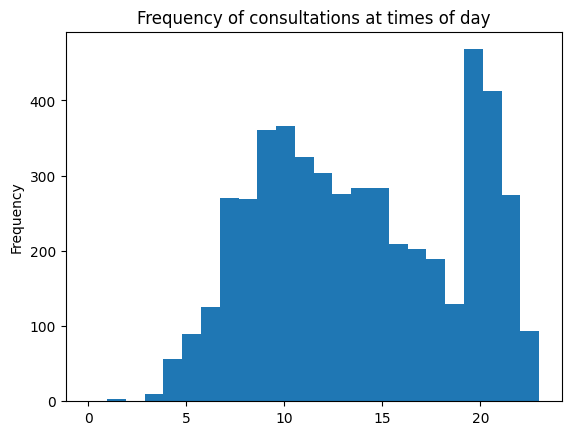

In [140]:
# histograms on frequency of consultations per time unit
data.extracted_consultation_date.dt.day.plot(kind='hist',title='Frequency of consultations per day of month', bins = 31)
plt.show()
data.extracted_consultation_date.dt.month.plot(kind='hist', title='Frequency of consultations per month', bins=12)
plt.show()
data.extracted_consultation_date.dt.hour.plot(kind='hist', title='Frequency of consultations at times of day', bins=24)
plt.show()